In [1]:
import numpy as np
import tensorflow as tf
import re
import time
from keras.models import Sequential
from keras .layers import Dense , LSTM ,Conv2D, Flatten
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
!pip install investpy 

In [3]:
import investpy
df = investpy.get_stock_historical_data(stock='GM',
                                        country='United States',
                                        from_date='01/01/2012',
                                        to_date='01/12/2020')

In [4]:
df.drop('Currency',axis=1,inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


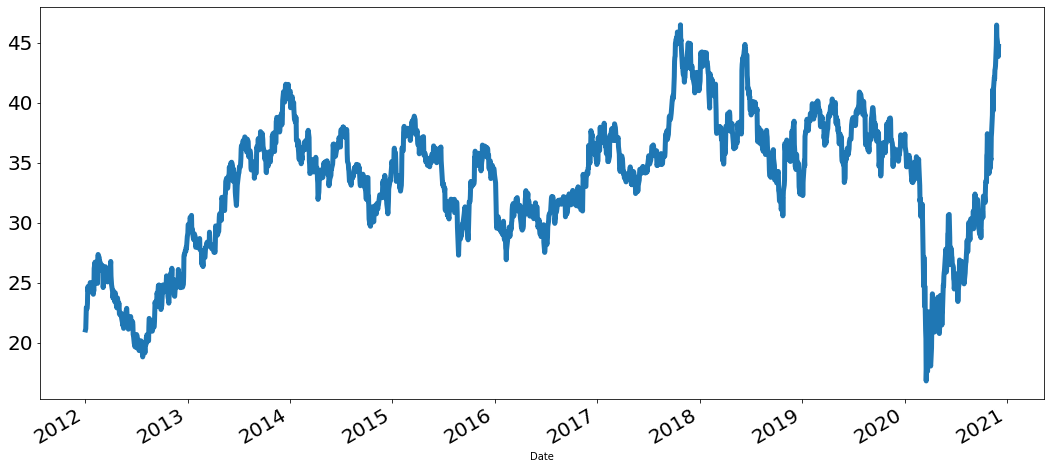

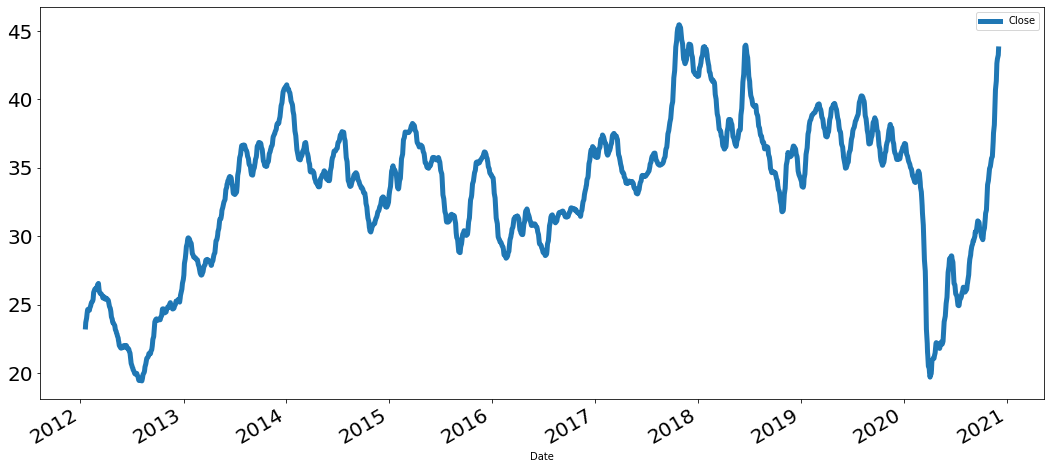

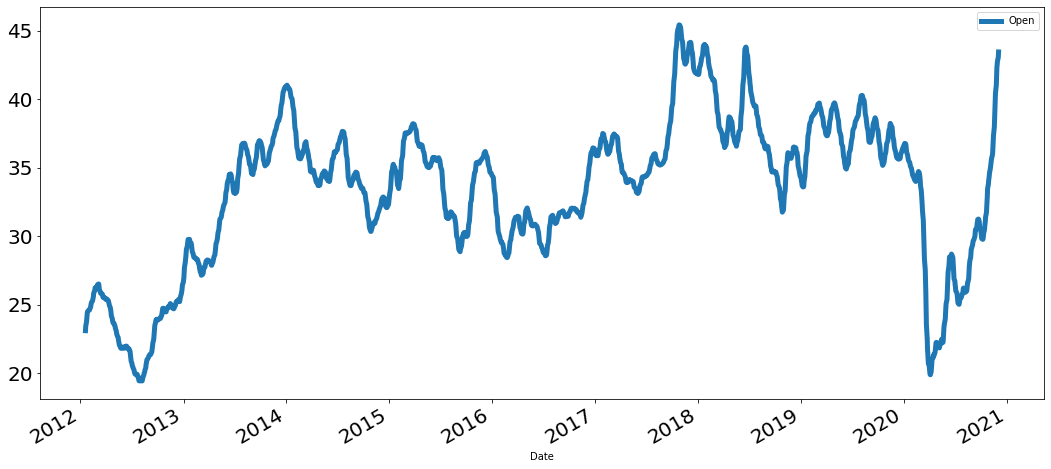

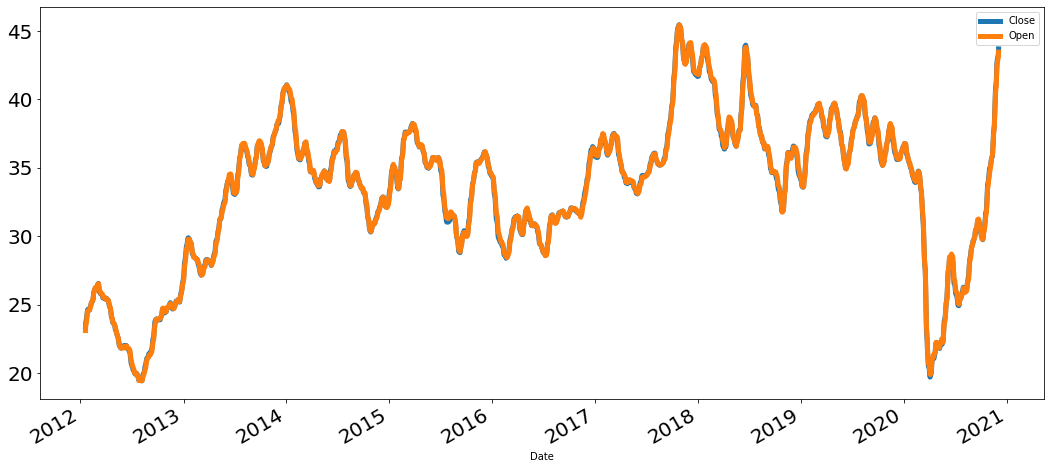

In [6]:
#Get The Profile 
fizer_profile = investpy.get_stock_company_profile(stock='PFE' , country='United States')

#Featch the trend
df['Close'].plot(figsize=(18,8), linewidth=5, fontsize=20)

close = df[['Close']]
close.rolling(12).mean().plot(figsize=(18,8), linewidth=5, fontsize=20)


open_price = df[['Open']]
open_price.rolling(12).mean().plot(figsize=(18,8), linewidth=5, fontsize=20)

df_rm = pd.concat([close.rolling(12).mean(), open_price.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(18,8), linewidth=5, fontsize=20)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


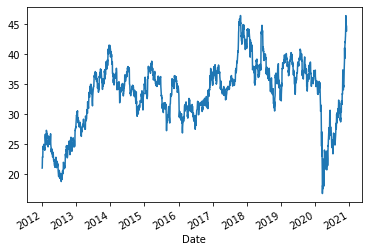

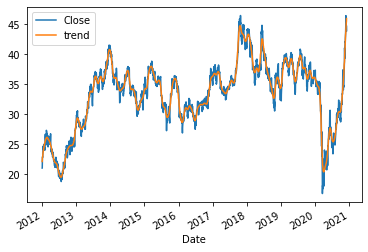

In [7]:

#Take The Trend from data
import statsmodels.api as sm
df['Close'].plot()
fizer_open , fizer_close  = sm.tsa.filters.hpfilter(df['Close'])

df['trend'] = fizer_close
df[['Close' , 'trend']].plot()

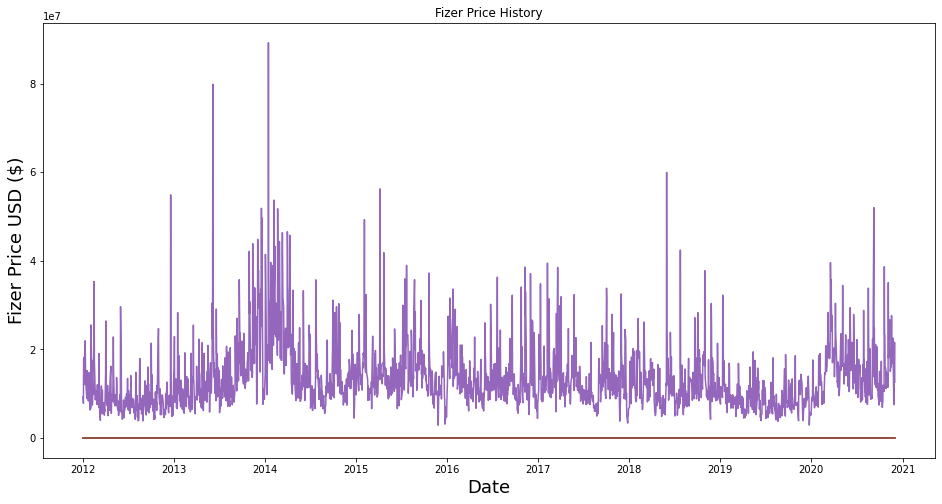

In [8]:
#Visulalize the closing and trend 
#Data
plt.figure(figsize=(16,8))
plt.title('Fizer Price History')
plt.plot(df)
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Fizer Price USD ($)' ,fontsize=18)
plt.show()


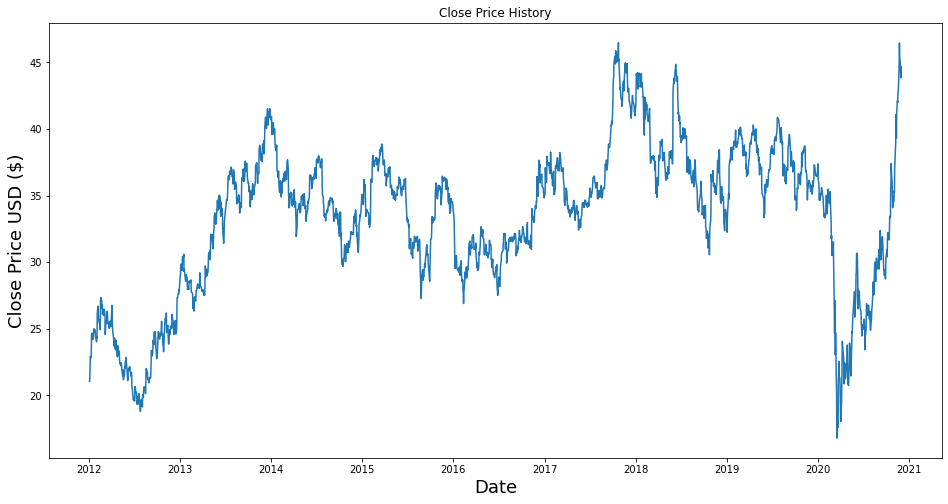

In [9]:

#Close
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Close Price USD ($)' ,fontsize=18)
plt.show()

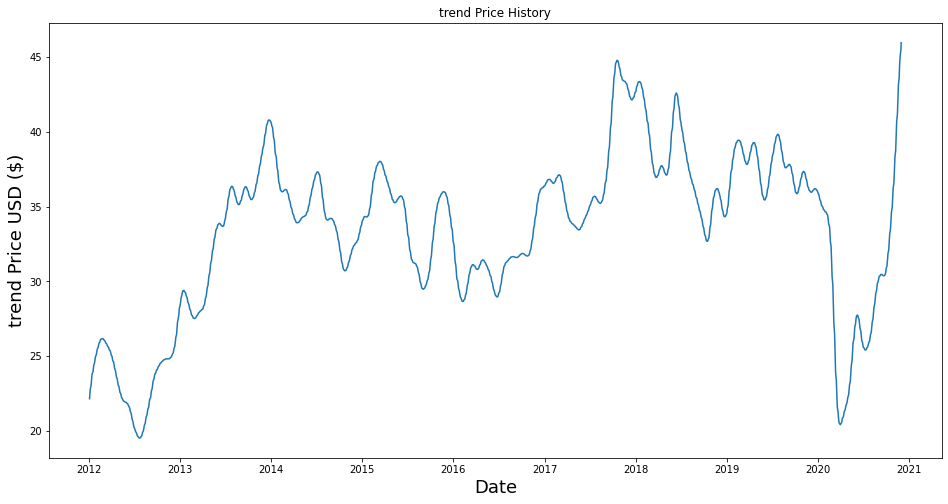

In [10]:
#Trend
plt.figure(figsize=(16,8))
plt.title('trend Price History')
plt.plot(df['trend'])
plt.xlabel('Date' , fontsize=18)
plt.ylabel('trend Price USD ($)' ,fontsize=18)
plt.show()

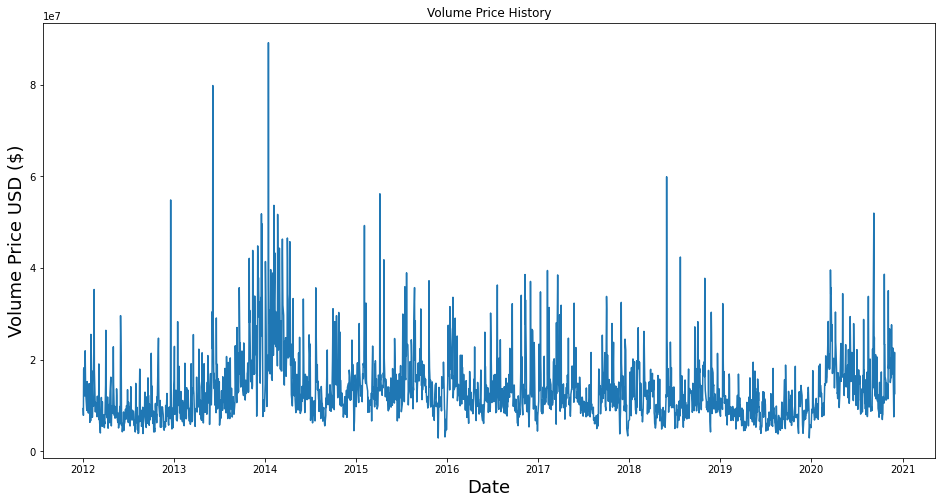

In [11]:
#Volume Price
plt.figure(figsize=(16,8))
plt.title('Volume Price History')
plt.plot(df['Volume'])
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Volume Price USD ($)' ,fontsize=18)
plt.show()

In [12]:
data = df.filter(['Close'])

In [13]:
dataset = data.values

In [14]:
#Creat the traning data
#Get the number of row to train the data on
traning_data_len = math.ceil(len(dataset) * .8)

In [15]:
traning_data_len

1796

In [16]:
#Scale the data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)

In [17]:
scaled_data

array([[0.14319407],
       [0.14656334],
       [0.18092992],
       ...,
       [0.95215633],
       [0.91105121],
       [0.9393531 ]])

In [18]:
#Create the Scaled training dataset

train_data = scaled_data[0:traning_data_len , :]

In [19]:
#Split the data to train and test
x_train = []
y_train = []

for i in range (60 ,len(train_data)):
    x_train.append(train_data[i-60:i ,0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print(len(x_train))
        print(len(y_train))

[array([0.14319407, 0.14656334, 0.18092992, 0.20619946, 0.20350404,
       0.21698113, 0.25842318, 0.26516173, 0.25235849, 0.24932615,
       0.25977089, 0.27021563, 0.27628032, 0.27358491, 0.26920485,
       0.27358491, 0.26684636, 0.25505391, 0.25033693, 0.24326146,
       0.25505391, 0.25303235, 0.31603774, 0.33355795, 0.31738544,
       0.30154987, 0.30121294, 0.29312668, 0.28773585, 0.28975741,
       0.27392183, 0.34939353, 0.35512129, 0.34568733, 0.32850404,
       0.3365903 , 0.31233154, 0.3254717 , 0.31469003, 0.3106469 ,
       0.32580863, 0.32513477, 0.30997305, 0.26212938, 0.2722372 ,
       0.29144205, 0.29716981, 0.28942049, 0.31233154, 0.32075472,
       0.31165768, 0.29548518, 0.28942049, 0.27931267, 0.28605121,
       0.27796496, 0.28200809, 0.2958221 , 0.28807278, 0.28133423])]
[0.2867250673854447]
1
1
[array([0.14319407, 0.14656334, 0.18092992, 0.20619946, 0.20350404,
       0.21698113, 0.25842318, 0.26516173, 0.25235849, 0.24932615,
       0.25977089, 0.27021563, 0.

In [20]:
#Convert the x_train and y_train to numpy array
x_train , y_train =np.array(x_train) , np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train ,(x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1736, 60, 1)

In [22]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(26,return_sequences=True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(160,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam' ,loss='mean_squared_error')
model.fit(x_train ,y_train ,batch_size=1 ,epochs=50)

Epoch 1/50
1736/1736 [==============================] - 13s 6ms/step - loss: 0.0048
Epoch 2/50
1736/1736 [==============================] - 10s 6ms/step - loss: 9.8409e-04
Epoch 3/50
1736/1736 [==============================] - 10s 6ms/step - loss: 6.9874e-04
Epoch 4/50
1736/1736 [==============================] - 10s 6ms/step - loss: 6.6618e-04
Epoch 5/50
1736/1736 [==============================] - 10s 6ms/step - loss: 5.6468e-04
Epoch 6/50
1736/1736 [==============================] - 10s 6ms/step - loss: 5.7108e-04
Epoch 7/50
1736/1736 [==============================] - 10s 6ms/step - loss: 6.4711e-04
Epoch 8/50
1736/1736 [==============================] - 10s 6ms/step - loss: 6.1909e-04
Epoch 9/50
1736/1736 [==============================] - 10s 6ms/step - loss: 5.4064e-04
Epoch 10/50
1736/1736 [==============================] - 10s 6ms/step - loss: 6.0343e-04
Epoch 11/50
1736/1736 [==============================] - 10s 6ms/step - loss: 5.6398e-04
Epoch 12/50
1736/1736 [===========

Create The Test Data Set

In [23]:
test_data = scaled_data[traning_data_len - 60 : , :]

In [24]:
x_test =[]
y_test = dataset[traning_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i ,0])

In [25]:
x_test =np.array(x_test)

In [26]:
x_test =np.reshape(x_test ,(x_test.shape[0] ,x_test.shape[1] ,1))

Get the model predection

In [27]:
pred = model.predict(x_test)

In [28]:
pred = scaler.inverse_transform(pred)

In [29]:
rmse = np.sqrt (np.mean (pred - y_test ) ** 2)
rmse

0.2791474257196699

In [30]:
train =data[:traning_data_len]
valid =data[traning_data_len:]
valid['Predections'] = pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


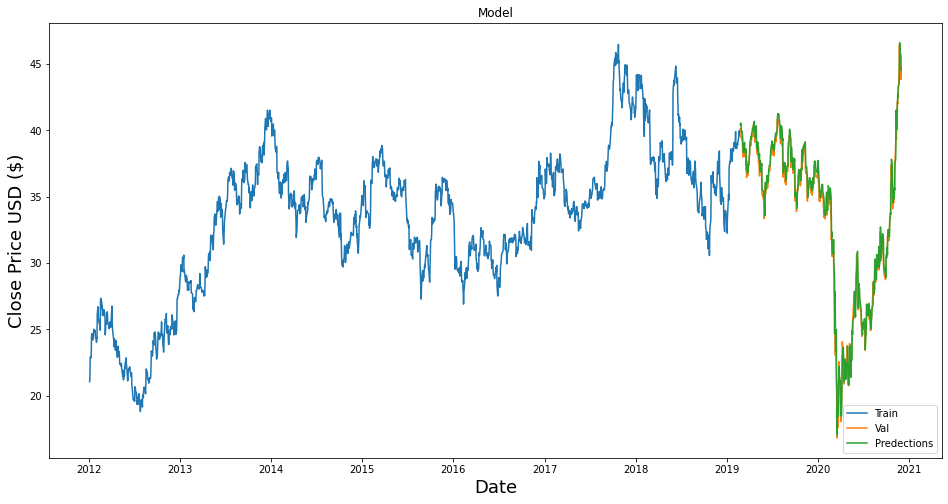

In [31]:
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predections']])
plt.legend(['Train' , 'Val' , 'Predections'] ,loc='lower right')
plt.show()

In [32]:
valid

,Close,Predections
Date,,
2019-02-25,40.14,40.401409
2019-02-26,40.11,40.558922
2019-02-27,40.00,40.505627
2019-02-28,39.48,40.428986
2019-03-01,39.53,39.902420
...,...,...
2020-11-24,46.46,45.131050
2020-11-25,45.46,46.614059
2020-11-27,45.06,45.877380


#Try to predict the day after from traninig 60 days

In [33]:
df = investpy.get_stock_historical_data(stock='GM',
                                        country='United States',
                                        from_date='01/10/2020',
                                        to_date='30/12/2020')

In [34]:
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-10-01,29.59,30.50,29.17,30.38,15052939,USD
2020-10-02,29.65,30.90,29.59,30.46,9474033,USD
2020-10-05,30.85,31.29,30.80,30.96,8314143,USD
2020-10-06,31.28,31.44,30.31,30.40,10293663,USD
2020-10-07,30.82,31.75,30.82,31.62,11794973,USD
...,...,...,...,...,...,...
2020-12-23,41.18,42.88,41.10,42.45,17573082,USD
2020-12-24,42.06,42.20,41.21,41.58,7825369,USD
2020-12-28,41.93,42.18,41.65,41.66,10471357,USD


In [35]:
df.drop('Currency' ,axis=1,inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-01,29.59,30.50,29.17,30.38,15052939
2020-10-02,29.65,30.90,29.59,30.46,9474033
2020-10-05,30.85,31.29,30.80,30.96,8314143
2020-10-06,31.28,31.44,30.31,30.40,10293663
2020-10-07,30.82,31.75,30.82,31.62,11794973


In [36]:
pred_data = df.filter(['Close'])
pred_data.head()

,Close
Date,
2020-10-01,30.38
2020-10-02,30.46
2020-10-05,30.96
2020-10-06,30.40
2020-10-07,31.62


In [37]:
last_60_days = pred_data[-60:].values
last_60_days

array([[30.4 ],
       [31.62],
       [32.21],
       [32.16],
       [32.21],
       [31.87],
       [31.67],
       [32.59],
       [33.45],
       [33.35],
       [35.6 ],
       [35.77],
       [37.41],
       [36.83],
       [35.82],
       [34.89],
       [34.09],
       [34.89],
       [34.53],
       [34.55],
       [35.35],
       [35.24],
       [37.14],
       [37.47],
       [38.96],
       [41.08],
       [40.56],
       [39.32],
       [41.19],
       [42.13],
       [41.98],
       [42.72],
       [42.82],
       [43.04],
       [44.77],
       [46.46],
       [45.46],
       [45.06],
       [43.84],
       [44.68],
       [44.58],
       [44.09],
       [44.4 ],
       [44.31],
       [43.8 ],
       [44.43],
       [42.87],
       [41.92],
       [41.62],
       [41.66],
       [41.42],
       [42.03],
       [41.01],
       [41.21],
       [40.9 ],
       [42.45],
       [41.58],
       [41.66],
       [41.57],
       [41.84]])

In [38]:
len(last_60_days)

60

Scale the data

In [39]:
last_60_days_scaled = scaler.transform(last_60_days)

In [40]:
X_test = []
X_test.append(last_60_days_scaled)

Convert the 2 month data to numpy array

In [41]:
X_test = np.array(X_test)

Reshape the data

In [42]:
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))
X_test

array([[[0.45822102],
        [0.49932615],
        [0.51920485],
        [0.51752022],
        [0.51920485],
        [0.50774933],
        [0.50101078],
        [0.53200809],
        [0.56098383],
        [0.55761456],
        [0.63342318],
        [0.63915094],
        [0.69440701],
        [0.67486523],
        [0.64083558],
        [0.60950135],
        [0.58254717],
        [0.60950135],
        [0.59737197],
        [0.59804582],
        [0.625     ],
        [0.6212938 ],
        [0.68530997],
        [0.69642857],
        [0.74663073],
        [0.8180593 ],
        [0.80053908],
        [0.75876011],
        [0.8217655 ],
        [0.85343666],
        [0.84838275],
        [0.87331536],
        [0.87668464],
        [0.88409704],
        [0.94238544],
        [0.99932615],
        [0.96563342],
        [0.95215633],
        [0.91105121],
        [0.9393531 ],
        [0.93598383],
        [0.91947439],
        [0.92991914],
        [0.92688679],
        [0.9097035 ],
        [0

##Get the predection Scaled Price for tomorwo

In [43]:
pred_price = model.predict(X_test)

Undo the scaeld 

In [44]:
pred_price = scaler.inverse_transform(pred_price)
print(f'80% The Predection Price for Tomoworo is : {pred_price}')

80% The Predection Price for Tomoworo is : [[42.15867]]


In [45]:
pred_data.tail()

,Close
Date,
2020-12-23,42.45
2020-12-24,41.58
2020-12-28,41.66
2020-12-29,41.57
2020-12-30,41.84


In [46]:
pred_data

,Close
Date,
2020-10-01,30.38
2020-10-02,30.46
2020-10-05,30.96
2020-10-06,30.40
2020-10-07,31.62
...,...
2020-12-23,42.45
2020-12-24,41.58
2020-12-28,41.66


In [53]:
  df1 = df.copy()
  df1["MA_Fast"]=df["Close"].ewm(span=12,min_periods=12).mean()
  df1["MA_Slow"]=df["Close"].ewm(span=26,min_periods=26).mean()
  df1["MACD"]=df1["MA_Fast"]-df1["MA_Slow"]
  df1["Signal"]=df1["MACD"].ewm(span=9,min_periods=9).mean()
  df1.dropna(inplace=True)
  df1.head()

,Open,High,Low,Close,Volume,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,
2020-11-17,41.82,42.53,41.16,41.98,16088206,39.334948,37.540610,1.794338,1.451643
2020-11-18,42.10,44.13,42.10,42.72,27632540,39.857234,37.952099,1.905134,1.553252
2020-11-19,42.72,43.18,42.19,42.82,17214470,40.314161,38.336775,1.977386,1.646050
2020-11-20,42.81,43.32,42.37,43.04,16887844,40.734390,38.706607,2.027783,1.728030
2020-11-23,43.88,45.16,43.58,44.77,22569560,41.356341,39.181230,2.175112,1.822648


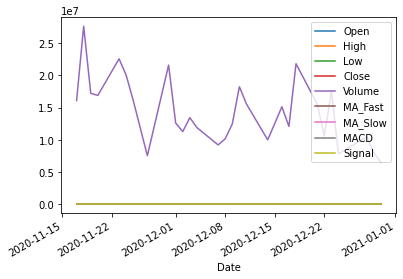

In [55]:
df1.plot();

In [58]:
  df2 = df.copy()
  df2['H-L']=abs(df2['High']-df2['Low'])
  df2['H-PC']=abs(df2['High']-df2['Close'].shift(1))
  df2['L-PC']=abs(df2['Low']-df2['Close'].shift(1))
  df2['TR']=df2[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
  df2['ATR'] = df2['TR'].rolling(20).mean()
  #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
  df3 = df2.drop(['H-L','H-PC','L-PC'],axis=1)
  df2.head()
  df3.head()

,Open,High,Low,Close,Volume,TR,ATR
Date,,,,,,,
2020-10-01,29.59,30.50,29.17,30.38,15052939,NaN,NaN
2020-10-02,29.65,30.90,29.59,30.46,9474033,1.31,NaN
2020-10-05,30.85,31.29,30.80,30.96,8314143,0.83,NaN
2020-10-06,31.28,31.44,30.31,30.40,10293663,1.13,NaN
2020-10-07,30.82,31.75,30.82,31.62,11794973,1.35,NaN


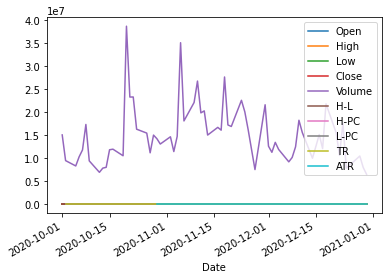

In [59]:
df2.plot()

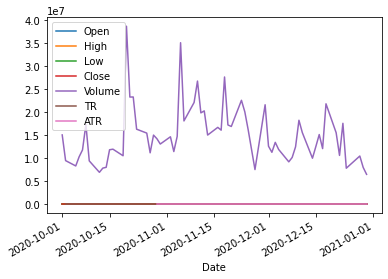

In [60]:
df3.plot()